# Chetima Cookbook:


sources:
https://www.geeksforgeeks.org/

In [26]:
#Importing the necessary packages.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

This cookbook provides simple but incredibly useful techniques that can be used to analyse data.

## 1.Merging dataframes:

This technique is used to combine multiple dataframes into one. It facilitates the data analysis and provides more clarity and organization to the work being done. I will demnstrate an example below.

Let's say that we want to study the correlation between Human development index and death rate across the globe:

In [3]:
#Reading the necessary csv files.
df1 = pd.read_csv("human-development-index.csv")
df2 = pd.read_csv("population-and-demography.csv")

In [4]:
#Now displaying the 2 dataframes in order to check their structure.
df1.columns

Index(['Entity', 'Code', 'Year', 'Human Development Index'], dtype='object')

In [5]:
df2.columns

Index(['Country name', 'Year', 'Death rate'], dtype='object')

The two dataframes have two comulmns in common: Year and Entity/country name, which contains the same variable but different names. I will then have to rename one of them. 

In [6]:
#Renaming a column's name in df2.
df2.rename(columns = {'Country name':'Entity'}, inplace = True)

In [7]:
df2.columns

Index(['Entity', 'Year', 'Death rate'], dtype='object')

Now we are ready to merge the dataframes. Using the merge() method. 

In [8]:
#Merging df1 and df2
Merged_df1_df2 = df1.merge(df2)
print(Merged_df1_df2)

           Entity Code  Year  Human Development Index  Death rate
0     Afghanistan  AFG  1990                    0.273      18.449
1     Afghanistan  AFG  1991                    0.279      17.946
2     Afghanistan  AFG  1992                    0.287      17.222
3     Afghanistan  AFG  1993                    0.297      14.838
4     Afghanistan  AFG  1994                    0.292      14.689
...           ...  ...   ...                      ...         ...
5598     Zimbabwe  ZWE  2017                    0.594       8.266
5599     Zimbabwe  ZWE  2018                    0.602       7.972
5600     Zimbabwe  ZWE  2019                    0.601       8.043
5601     Zimbabwe  ZWE  2020                    0.600       8.132
5602     Zimbabwe  ZWE  2021                    0.593       9.057

[5603 rows x 5 columns]


Above is the merged dataframe for df1 and df2 with years they have in common, form 1990 until 2021.

## 2.Groupby:

This function can be used to do mutiple tasks involving two columns from the same dataframe.

In this case, I am looking for the minimum and maximum death rates from each entity, over 31 years, from 1990 to 2021.

In [9]:
Min_Max = df2.groupby("Entity")["Death rate"].agg([min, max])
print(Min_Max)

                  min     max
Entity                       
Afghanistan     6.791  37.945
Africa (UN)     8.162  26.636
Albania         5.466  22.450
Algeria         4.392  25.046
American Samoa  4.349   9.586
...               ...     ...
Western Sahara  6.057  29.029
World           7.462  19.518
Yemen           5.507  35.147
Zambia          6.571  19.740
Zimbabwe        7.972  19.048

[255 rows x 2 columns]


## 3.Visualizating data with a library:

To better determine the correlation from part 1) we can make a scatter plot.

We are first narrowing down the data to one particular year to facilitate the visualization.

In [10]:
merged_2021 = Merged_df1_df2[Merged_df1_df2["Year"] == 2021]

In [11]:
merged_2021

,Entity,Code,Year,Human Development Index,Death rate
31,Afghanistan,AFG,2021,0.478,7.344
63,Albania,ALB,2021,0.796,11.325
95,Algeria,DZA,2021,0.745,4.546
117,Andorra,AND,2021,0.858,8.180
140,Angola,AGO,2021,0.586,8.009
...,...,...,...,...,...
5474,Vietnam,VNM,2021,0.703,7.317
5506,World,OWID_WRL,2021,0.732,8.756
5538,Yemen,YEM,2021,0.455,6.845
5570,Zambia,ZMB,2021,0.565,6.973


### visualizing with plyplot:

Firstly we have to call pyplot as plt and select the visualization type. The first argument reprents the column that has to be lotted on the x-axis and the second argument is the columns that has to be plotted on the y-axis.

Text(0.5, 1.0, 'Death rate vs HDI')

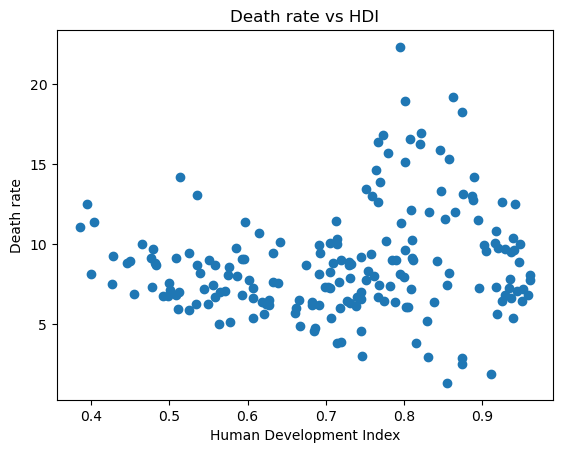

In [12]:
plt.scatter(merged_2021["Human Development Index"], merged_2021["Death rate"])
plt.ylabel("Death rate")
plt.xlabel("Human Development Index")
plt.title("Death rate vs HDI")

### Visualizing with seaborn:


The first part of the code consists of calling the package previously imported and select the visualization type as done with pyplot. In the second part we assign the columns we would like to plot to the x and y axis we would repectively want to see them plotted on. 

<AxesSubplot:xlabel='Human Development Index', ylabel='Death rate'>

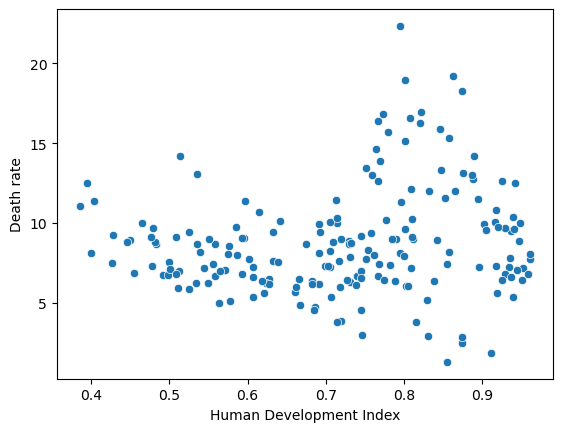

In [13]:
sns.scatterplot(x= merged_2021["Human Development Index"], y= merged_2021["Death rate"])

## 4.Value counts: 

This is one the most simple but efficient tools I have used in this class.

This function can be used the number of times a variable is repeated in a specific column.

In [21]:
#The number of times a specific Human Development Index(HDI) repeats itself. Meaning how many countries have the same HDI.
merged_2021["Human Development Index"].value_counts()

0.745    4
0.607    3
0.767    3
0.802    3
0.875    3
        ..
0.940    1
0.498    1
0.597    1
0.890    1
0.565    1
Name: Human Development Index, Length: 163, dtype: int64

We can also sort them in a descending or ascending order. By assigning either False for descending or True for ascending, to sort.

In [25]:
merged_2021["Human Development Index"].value_counts(sort = False)

0.478    1
0.796    1
0.745    4
0.858    2
0.586    1
        ..
0.691    1
0.703    1
0.732    1
0.455    1
0.565    1
Name: Human Development Index, Length: 163, dtype: int64

It is also possible to find proportions. In our case, we can determine the proportion of an HDI within our dataset. For example, only 2% of the dataset have a HDI equal to 0.745. 

In [23]:
merged_2021["Human Development Index"].value_counts(normalize = True)

0.745    0.020833
0.607    0.015625
0.767    0.015625
0.802    0.015625
0.875    0.015625
           ...   
0.940    0.005208
0.498    0.005208
0.597    0.005208
0.890    0.005208
0.565    0.005208
Name: Human Development Index, Length: 163, dtype: float64

Finally, we can sort and normalize at the same time.

In [24]:
merged_2021["Human Development Index"].value_counts(sort = True, normalize = True)

0.745    0.020833
0.607    0.015625
0.767    0.015625
0.802    0.015625
0.875    0.015625
           ...   
0.940    0.005208
0.498    0.005208
0.597    0.005208
0.890    0.005208
0.565    0.005208
Name: Human Development Index, Length: 163, dtype: float64